# Run Any Kind of Logistic Regression (Binomial, Multinomial, etc.)

### Authors: Calvin Howard.

#### Last updated: March 16, 2024

Use this to run/test a statistical model on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Directory

In [31]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability/200fit_500pred'

Import Data

In [32]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/updated_with_all_adni/master_dx_updated_fix.csv'
sheet = None

In [33]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,subid,Age,Male,Female,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,CSF_Parietal,...,TOTAL11,TOTALMOD,DX_BASELINE,DX_M12,DIAGNOSIS_BL,DIAGNOSIS_CURRENT,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str
0,002_S_0295,84.898630,1.0,0.0,-26319.381520,373.297842,-746.688684,-24081.964640,-32607.592110,-18245.868460,...,3.00,4.00,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
1,002_S_0413,76.397260,0.0,1.0,-13670.888710,5009.504947,-449.838607,-8185.340726,-13903.977170,-6191.852471,...,3.33,4.33,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
2,002_S_0954,69.452055,0.0,1.0,-27912.718120,267.960111,-26.245064,-14384.382220,1174.325661,-13108.994170,...,10.67,21.67,MCI,Alzheimer,2.0,3.0,3.0,MCI,Alzheimer,Alzheimer
3,003_S_1057,61.273973,0.0,1.0,-3441.984646,8102.022733,-157.009052,-11631.937370,-11106.858210,-14756.563150,...,11.33,20.33,MCI,MCI,2.0,3.0,2.0,MCI,Alzheimer,MCI
4,003_S_1122,76.764384,0.0,1.0,-9127.083112,8399.639128,-57.383241,-11919.752740,1985.249349,-7048.794398,...,5.00,9.00,MCI,MCI,2.0,2.0,2.0,MCI,MCI,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,018_S_0043,76.268493,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.00,10.00,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
1384,100_S_0035,77.000000,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.00,9.00,Normal,Normal,1.0,2.0,1.0,Normal,MCI,Normal
1385,023_S_0030,80.049315,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10.00,22.00,MCI,Alzheimer,2.0,3.0,3.0,MCI,Alzheimer,Alzheimer
1386,100_S_0015,80.926027,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7.00,9.00,Normal,Normal,1.0,2.0,1.0,Normal,MCI,Normal


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [34]:
drop_list = ['Diagnosis','GM_MTL', 'Cohort']


In [35]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subid,Age,Male,Female,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,CSF_Parietal,...,TOTAL11,TOTALMOD,DX_BASELINE,DX_M12,DIAGNOSIS_BL,DIAGNOSIS_CURRENT,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str
0,002_S_0295,84.898630,1.0,0.0,-26319.381520,373.297842,-746.688684,-24081.964640,-32607.592110,-18245.868460,...,3.00,4.00,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
1,002_S_0413,76.397260,0.0,1.0,-13670.888710,5009.504947,-449.838607,-8185.340726,-13903.977170,-6191.852471,...,3.33,4.33,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
2,002_S_0954,69.452055,0.0,1.0,-27912.718120,267.960111,-26.245064,-14384.382220,1174.325661,-13108.994170,...,10.67,21.67,MCI,Alzheimer,2.0,3.0,3.0,MCI,Alzheimer,Alzheimer
3,003_S_1057,61.273973,0.0,1.0,-3441.984646,8102.022733,-157.009052,-11631.937370,-11106.858210,-14756.563150,...,11.33,20.33,MCI,MCI,2.0,3.0,2.0,MCI,Alzheimer,MCI
4,003_S_1122,76.764384,0.0,1.0,-9127.083112,8399.639128,-57.383241,-11919.752740,1985.249349,-7048.794398,...,5.00,9.00,MCI,MCI,2.0,2.0,2.0,MCI,MCI,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,941_S_1197,82.484932,0.0,1.0,-13872.558410,4601.684568,-458.421924,-16817.122550,-21263.165420,-23822.893740,...,6.33,11.33,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
757,941_S_1203,83.421918,1.0,0.0,-8536.033876,3546.800696,-97.105074,-17019.967590,-17954.145460,-24064.472130,...,6.33,10.33,Normal,Normal,1.0,2.0,1.0,Normal,MCI,Normal
758,941_S_1295,76.805479,1.0,0.0,-21425.028080,-7503.054536,-1148.289402,-31590.371470,-54998.175370,-35886.096130,...,14.33,20.33,MCI,MCI,2.0,3.0,2.0,MCI,Alzheimer,MCI
759,941_S_1311,69.186301,1.0,0.0,-27931.833440,-18230.854220,-2041.659358,-29198.450840,-40067.353340,-33367.429880,...,13.33,18.33,MCI,Alzheimer,2.0,3.0,3.0,MCI,Alzheimer,Alzheimer


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [36]:
data_df.columns

Index(['subid', 'Age', 'Male', 'Female', 'CSF_Cerebellum', 'CSF_Subcortex',
       'CSF_MTL', 'CSF_Occipital', 'CSF_Frontal', 'CSF_Parietal',
       'CSF_Temporal', 'GM_Cerebellum', 'GM_Subcortex', 'GM_MTL',
       'GM_Occipital', 'GM_Frontal', 'GM_Parietal', 'GM_Temporal',
       'WM_Cerebellum', 'WM_Subcortex', 'WM_MTL', 'WM_Occipital', 'WM_Frontal',
       'WM_Parietal', 'WM_Temporal', 'Visual_Frontal', 'Visual_Parietal',
       'Visual_Occipital', 'Visual_Temporal', 'Visual_Cerebellum',
       'Visual_Subcortex', 'Visual_MTL', 'Diagnosis', 'Sex', 'Cohort',
       'CTh_Cerebellum', 'CTh_MTL', 'CTh_Occipital', 'CTh_Frontal',
       'CTh_Parietal', 'CTh_Temporal', 'CTh_Subcortex', 'Q4', 'TOTAL11',
       'TOTALMOD', 'DX_BASELINE', 'DX_M12', 'DIAGNOSIS_BL',
       'DIAGNOSIS_CURRENT', 'DIAGNOSIS_M12', 'DIAGNOSIS_BL_Str',
       'DIAGNOSIS_CURRENT_Str', 'DIAGNOSIS_M12_Str'],
      dtype='object')

Set the parameters for dropping rows

In [37]:
column = 'Diagnosis'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'Alzheimer' # The value to drop if found

In [38]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subid,Age,Male,Female,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,CSF_Parietal,...,TOTAL11,TOTALMOD,DX_BASELINE,DX_M12,DIAGNOSIS_BL,DIAGNOSIS_CURRENT,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str
0,002_S_0295,84.898630,1.0,0.0,-26319.381520,373.297842,-746.688684,-24081.964640,-32607.592110,-18245.868460,...,3.00,4.00,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
1,002_S_0413,76.397260,0.0,1.0,-13670.888710,5009.504947,-449.838607,-8185.340726,-13903.977170,-6191.852471,...,3.33,4.33,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
2,002_S_0954,69.452055,0.0,1.0,-27912.718120,267.960111,-26.245064,-14384.382220,1174.325661,-13108.994170,...,10.67,21.67,MCI,Alzheimer,2.0,3.0,3.0,MCI,Alzheimer,Alzheimer
3,003_S_1057,61.273973,0.0,1.0,-3441.984646,8102.022733,-157.009052,-11631.937370,-11106.858210,-14756.563150,...,11.33,20.33,MCI,MCI,2.0,3.0,2.0,MCI,Alzheimer,MCI
4,003_S_1122,76.764384,0.0,1.0,-9127.083112,8399.639128,-57.383241,-11919.752740,1985.249349,-7048.794398,...,5.00,9.00,MCI,MCI,2.0,2.0,2.0,MCI,MCI,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,941_S_1197,82.484932,0.0,1.0,-13872.558410,4601.684568,-458.421924,-16817.122550,-21263.165420,-23822.893740,...,6.33,11.33,Normal,Normal,1.0,1.0,1.0,Normal,Normal,Normal
757,941_S_1203,83.421918,1.0,0.0,-8536.033876,3546.800696,-97.105074,-17019.967590,-17954.145460,-24064.472130,...,6.33,10.33,Normal,Normal,1.0,2.0,1.0,Normal,MCI,Normal
758,941_S_1295,76.805479,1.0,0.0,-21425.028080,-7503.054536,-1148.289402,-31590.371470,-54998.175370,-35886.096130,...,14.33,20.33,MCI,MCI,2.0,3.0,2.0,MCI,Alzheimer,MCI
759,941_S_1311,69.186301,1.0,0.0,-27931.833440,-18230.854220,-2041.659358,-29198.450840,-40067.353340,-33367.429880,...,13.33,18.33,MCI,Alzheimer,2.0,3.0,3.0,MCI,Alzheimer,Alzheimer


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [39]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['DX_M12'] # ['Z_Scored_Percent_Cognitive_Improvement_By_Origin_Group', 'Z_Scored_Subiculum_T_By_Origin_Group_'] #['Age']


In [19]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column subid
Unable to standardize column Diagnosis
Unable to standardize column Sex
Unable to standardize column DX_BASELINE
Unable to standardize column DIAGNOSIS_BL_Str
Unable to standardize column DIAGNOSIS_CURRENT_Str
Unable to standardize column DIAGNOSIS_M12_Str


,subid,Age,Male,Female,CSF_Cerebellum,CSF_Subcortex,CSF_MTL,CSF_Occipital,CSF_Frontal,CSF_Parietal,...,TOTAL11,TOTALMOD,DX_BASELINE,DX_M12,DIAGNOSIS_BL,DIAGNOSIS_CURRENT,DIAGNOSIS_M12,DIAGNOSIS_BL_Str,DIAGNOSIS_CURRENT_Str,DIAGNOSIS_M12_Str
150,002_S_4270,NaN,NaN,NaN,1.104880,0.960351,1.121841,1.298230,1.565215,1.340019,...,-0.990919,-1.157147,Control,Control,-1.37413,-0.173156,-1.179612,Normal,MCI,Normal
151,018_S_4313,0.291519,-1.193416,1.193416,1.260256,1.045834,0.995697,1.481651,0.932316,1.652535,...,-0.576071,-0.479334,NaN,MCI,-1.37413,-1.426476,-1.179612,Normal,Normal,Normal
152,024_S_4169,-1.828738,-1.193416,1.193416,2.011224,1.304458,1.049810,1.579496,1.625824,1.860599,...,-0.990919,-1.292710,NaN,Control,0.65355,-0.173156,0.366831,MCI,MCI,MCI
153,027_S_0120,-0.412789,0.837931,-0.837931,-0.447265,0.979206,0.553882,0.268913,0.414231,0.371884,...,-0.092773,-0.299036,Normal,Control,-1.37413,-1.426476,-1.179612,Normal,Normal,Normal
154,053_S_4661,-0.184323,0.837931,-0.837931,-0.804837,0.646761,1.035158,0.941267,0.065533,0.829605,...,-0.368647,-0.343772,NaN,MCI,0.65355,1.080164,1.913273,MCI,Alzheimer,Alzheimer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,941_S_1197,1.049857,-1.193416,1.193416,0.713593,0.645475,0.279713,0.559567,0.281334,0.151393,...,-0.715045,-0.570161,Normal,Normal,-1.37413,-1.426476,-1.179612,Normal,Normal,Normal
757,941_S_1203,1.181842,0.837931,-0.837931,1.244004,0.525377,0.826371,0.541217,0.453817,0.134980,...,-0.715045,-0.705724,Normal,Normal,-1.37413,-0.173156,-1.179612,Normal,MCI,Normal
758,941_S_1295,0.249840,0.837931,-0.837931,-0.037065,-0.732649,-0.764028,-0.776917,-1.477107,-0.668212,...,0.944347,0.649901,MCI,MCI,0.65355,1.080164,0.366831,MCI,Alzheimer,MCI
759,941_S_1311,-0.823410,0.837931,-0.837931,-0.683792,-1.954009,-2.115660,-0.560528,-0.698836,-0.497087,...,0.736923,0.378776,MCI,Alzheimer,0.65355,1.080164,1.913273,MCI,Alzheimer,Alzheimer


# 00 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**Normal Logistic**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Binary Outcome ~ Predictor1 + Predictor2'

**Multiple Logistic**
- Assesses the impact of predictor on an outcome.
- formula = 'Ordinal Outcome ~ Predictor1 + Predictor2'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [40]:
data_df.columns

Index(['subid', 'Age', 'Male', 'Female', 'CSF_Cerebellum', 'CSF_Subcortex',
       'CSF_MTL', 'CSF_Occipital', 'CSF_Frontal', 'CSF_Parietal',
       'CSF_Temporal', 'GM_Cerebellum', 'GM_Subcortex', 'GM_MTL',
       'GM_Occipital', 'GM_Frontal', 'GM_Parietal', 'GM_Temporal',
       'WM_Cerebellum', 'WM_Subcortex', 'WM_MTL', 'WM_Occipital', 'WM_Frontal',
       'WM_Parietal', 'WM_Temporal', 'Visual_Frontal', 'Visual_Parietal',
       'Visual_Occipital', 'Visual_Temporal', 'Visual_Cerebellum',
       'Visual_Subcortex', 'Visual_MTL', 'Diagnosis', 'Sex', 'Cohort',
       'CTh_Cerebellum', 'CTh_MTL', 'CTh_Occipital', 'CTh_Frontal',
       'CTh_Parietal', 'CTh_Temporal', 'CTh_Subcortex', 'Q4', 'TOTAL11',
       'TOTALMOD', 'DX_BASELINE', 'DX_M12', 'DIAGNOSIS_BL',
       'DIAGNOSIS_CURRENT', 'DIAGNOSIS_M12', 'DIAGNOSIS_BL_Str',
       'DIAGNOSIS_CURRENT_Str', 'DIAGNOSIS_M12_Str'],
      dtype='object')

In [41]:
formula = "Cohort ~  GM_Frontal + GM_Temporal + GM_Parietal + GM_Occipital + GM_MTL + GM_Cerebellum + GM_Subcortex"

In [42]:
# formula = "DIAGNOSIS_CURRENT_Str ~ CTh_MTL"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [43]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,GM_Frontal,GM_Temporal,GM_Parietal,GM_Occipital,GM_MTL,GM_Cerebellum,GM_Subcortex
0,1.0,-20979.370240,-7119.140252,-18150.595610,-12707.897790,-1843.815629,-23248.955500,1038.504856
1,1.0,-42769.404810,-9506.144808,-24290.171850,-20506.349750,-1628.061818,-4562.384254,6161.244622
2,1.0,77372.733510,48646.336720,51677.277810,33186.090890,198.507728,24935.280210,-9318.628653
3,1.0,-8331.900573,12020.086560,15429.426780,12998.796700,-836.205121,2344.896594,34023.478140
4,1.0,51378.853930,34376.658980,38881.544680,32079.520190,-1947.028095,25139.920610,38399.088790
...,...,...,...,...,...,...,...,...
756,1.0,6137.238471,13685.745510,251.069586,3666.994786,-933.901558,4174.322515,20783.922910
757,1.0,-14172.291660,-14320.037170,739.396868,2763.244377,-2239.169021,-20234.921810,16171.366210
758,1.0,-36429.191000,-10217.137080,-8664.234163,-4281.099256,-888.209347,-6201.197900,9389.125887
759,1.0,-24449.275880,-8423.817357,-12505.123040,8191.124247,-1552.718273,-7522.223335,-23928.050200


Check multicollinearity in design matrix

In [44]:
#Multico. Check
from calvin_utils.statistical_utils.statistical_measurements import calculate_vif
calculate_vif(design_matrix)

,features,VIF
0,Intercept,5.910235
1,GM_Frontal,5.959764
2,GM_Temporal,6.556555
3,GM_Parietal,6.653497
4,GM_Occipital,4.695281
5,GM_MTL,2.593405
6,GM_Cerebellum,1.706053
7,GM_Subcortex,1.575171


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [45]:
outcome_matrix

,Cohort
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
756,2.0
757,2.0
758,2.0
759,2.0


**CRITICAL IN MULTINOMIAL LOGISTIC REGRESSION**
- A multinomial logistic reg. will set results RELATIVE TO A REFERENCE class. 
- The reference class is the first classification the multinomial encounters.
- **Especially if you are running a multinomial logistic regression, set your reference class below**

In [46]:
reference = 'Diagnosis[Control]'

# 04 - Run the Regression

Regression Results Are Displayed Below

- This will run a binomial or a multinomial logit dependig on your outcome matrix. 
- A multinomial logit will display N-1 categories, where N is the number of potential classifications you have. This occurs because everything is set in reference to that class. 
- So, the reference will either be the first column in your outcomes_matrix, or you can manually set it first.

In [47]:
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
logreg = LogisticRegression(outcome_matrix, design_matrix)
results = logreg.run()
results.summary2()

ValueError: endog must be in the unit interval.

# 6 - Receiver Operating Characteristic
- The ROC considers clasisfications acoss ALL POSSIBLE PROBABILITIES, demonstrating what is ultiamtely accomplishable at the best possible threshold

- First curve is ROC for classifcation of each class with respect to all other classes
- Second Curve (Macro Average) is basically a meta-analytic ROC with equal weight per class.
- Third Curve (Micro Average) is basically a meta-analytic ROC with weight proportional to class sample

In [ ]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
evaluator.run()

ADVANCED
- code specific manual thresholds to intervene upon classifications

Step 1: relate integer (index) to class

In [264]:
# evaluator.relate_index_to_class()

Step 2: in a dictionary of the indices (corresponding to class), key in the lambda function to edit the probability. 
- Code from left to right, giving priority to each method. 
- Example:
```
>thresholds = {
>            0: lambda probs: 0 if probs[0] > 0.5 else (1 if probs[0] > 0.25 else 2),  # Adjust class_0 predictions
>            1: lambda probs: None,  # No threshold adjustment for class_1
>            2: lambda probs: None   # No threshold adjustment for class_2
>        }
```

In [46]:
# thresholds = {
#     0: lambda prob: 0,  # Always keep class 0
#     1: lambda prob: 1,  # Always keep class 1
#     2: lambda prob: 2 if prob[2] > 0.5 else (1 if prob[1] > 0.3 else 0)  # Conditional adjustment for class 2
# }


Step 3: Check the effect

In [ ]:
# from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
# evaluator = ComprehensiveMulticlassROC(fitted_model=results, observation_df=outcome_matrix, normalization='pred', thresholds=thresholds, out_dir=out_dir)
# evaluator.run()

Step 4: YOU MUST LOOCV AND VALIDATE IN OUT-OF-SAMPLE DATA.
- add thresholds as an argument to any further calls to ComprehensiveMulticlassROC

Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

Permutation Test Two AUCs

In [ ]:
data_df.columns

In [354]:
f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

Bootstrap the Micro Average AUC

In [ ]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend

mean_auc, lower_ci, upper_ci = bootstrap_auc(outcome_matrix, design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

Permutation Test Two AUCs

In [ ]:
data_df.columns

In [ ]:
f1 = "Diagnosis ~ CerebellumCSF + ParietalCSF + MTLCSF + OccipitalCSF + FrontalCSF + temp_ins_csf + SubcortexCSF"
f2 = "Diagnosis ~ CerebellumGM + ParietalGM + MTLGM + OccipitalGM + FrontalGM + temp_ins_gm + SubcortexGM"

In [ ]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(data_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observde AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

# 06 - Visualize the Regression as a Forest Plot
- This will probably look poor if you ran a regression without standardizing your data. 

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import MultinomialForestPlot

multinomial_forest = MultinomialForestPlot(model=results, sig_digits=2, out_dir=None, table=False)
multinomial_forest.run()

# 07 - Generate Partial Dependence Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialDependencePlot
pdp = PartialDependencePlot(formula=formula, data_df=data_df, model=results, design_matrix=design_matrix, outcomes_df=outcome_matrix, data_range=None, out_dir=None, marginal_method='mean', debug=False)
pdp.run()

# 08 - Visualize the Partial Regression Plots

In [ ]:
from calvin_utils.statistical_utils.statistical_measurements import PartialRegressionPlot
partial_plot = PartialRegressionPlot(model=results, design_matrix=design_matrix, out_dir=out_dir, palette=None)
partial_plot = partial_plot.run()

# 09 - LOOCV

In [ ]:
import pandas as pd
from calvin_utils.statistical_utils.logistic_regression import LogisticRegression
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
y_true, y_pred, test_prob = LogisticRegression.run_loocv(outcome_matrix, design_matrix)
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=pd.DataFrame(test_prob, columns=outcome_matrix.columns), observation_df=outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

# 10 - Predict Unseen Data

In [30]:
# new_csv_path='/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/metadata/true_ad_patient_data/z0_atrophy_unthresholded.csv'

Option A - Get New Data

In [31]:
# from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# # Instantiate the PalmPrepararation class
# new_palm = CalvinStatsmodelsPalm(input_csv_path=new_csv_path, output_dir=out_dir, sheet=sheet)
# # Call the process_nifti_paths method
# other_df = new_palm.read_and_display_data()

In [32]:
# formula

In [33]:
# column_renaming_map = {
#                        'Mesial_Temporal': 'mesial_temporal_eh', 
#                        'parietal': 'parietal_eh', 
#                        'frontal': 'frontal_eh',
#                        'temporal': 'temporal_eh', 
#                        'ventricle':'ventricle_eh',
#                        'occipital': 'occipital_eh'}

In [34]:
# other_df.rename(columns=column_renaming_map, inplace=True)

Option B - Use "Other DF" With all the Other Stuff From Above

In [59]:
other_df = other_df

In [ ]:
other_df

Prep

In [225]:
# Define the design matrix
# subset_df = other_df.groupby('DIAGNOSIS_BL').apply(lambda x: x.sample(min(len(x), 200))).reset_index(drop=True)

other_outcome_matrix, other_design_matrix = cal_palm.define_design_matrix(formula, other_df)
# if len(new_outcome_matrix.columns) != len(outcome_matrix.columns):
#     zero_df = pd.DataFrame(0, index=outcome_matrix.index, columns=outcome_matrix.columns)
#     zero_df.loc[:, new_outcome_matrix.columns] = new_outcome_matrix.loc[:, new_outcome_matrix.columns]
#     new_outcome_matrix = zero_df

Predict

Evaluate

Taking maximum probability as prediction.
There are 48.0 observations for Diagnosis[Alzheimer]
There are 51.0 observations for Diagnosis[MCI]
There are 51.0 observations for Diagnosis[Normal]
Optimal Thresholds: 
 {0: 0.7475242784120327, 1: 0.05257309435124544, 2: 0.13176887140313479}


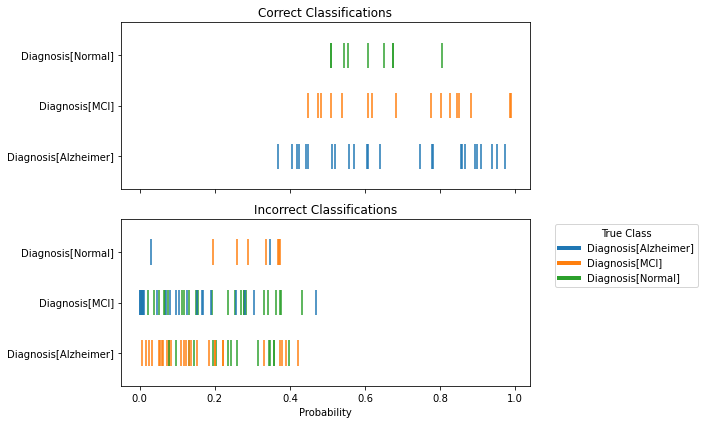

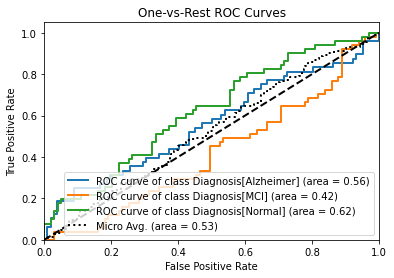

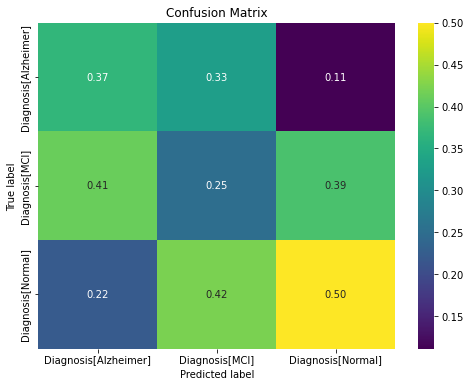

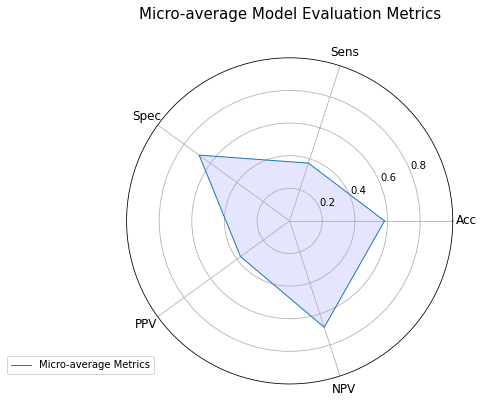

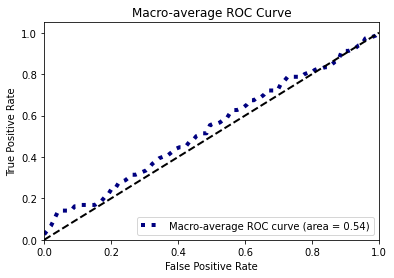

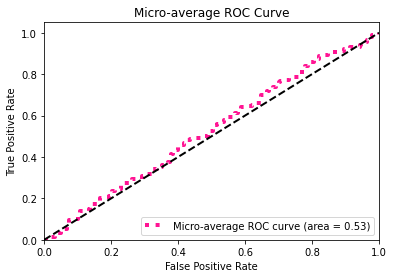

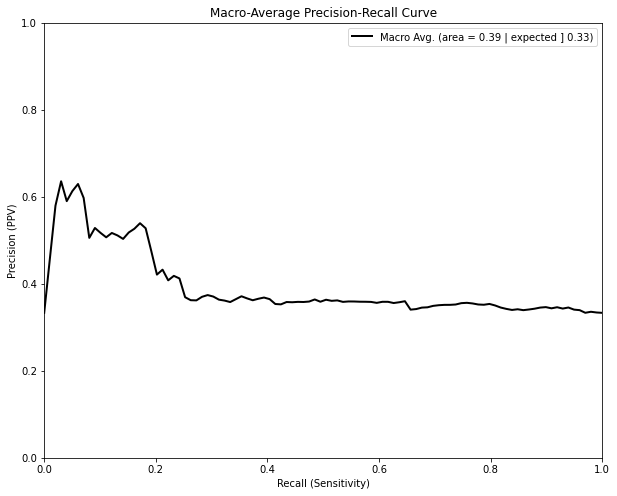

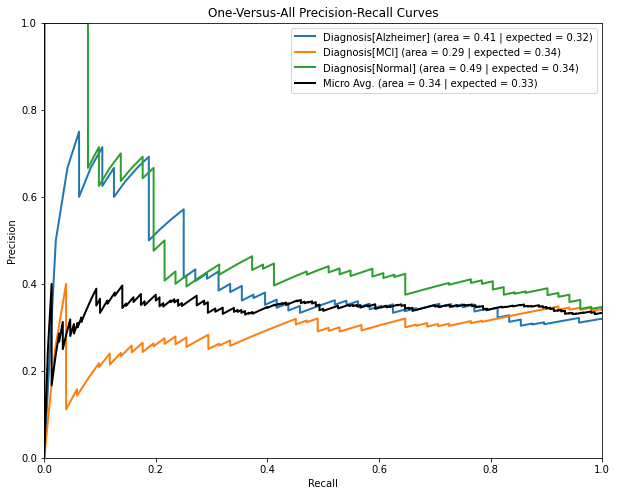

In [226]:
from calvin_utils.statistical_utils.classification_statistics import ComprehensiveMulticlassROC
loocv_evaluator = ComprehensiveMulticlassROC(fitted_model=None, predictions_df=results.predict(other_design_matrix), observation_df=other_outcome_matrix, normalization='pred', thresholds=None, out_dir=out_dir)
loocv_evaluator.run()

In [ ]:
loocv_evaluator.get_micro_auc()

Bootstrap the Micro Average AUC

In [227]:
import matplotlib
from calvin_utils.statistical_utils.classification_statistics import bootstrap_auc
matplotlib.use('Agg')  # Use a non-interactive backend
mean_auc, lower_ci, upper_ci = bootstrap_auc(other_outcome_matrix, other_design_matrix, n_iterations=1000)
print(f'Mean AUC: {mean_auc}, 95% CI: ({lower_ci}, {upper_ci})')

100%|██████████| 1000/1000 [00:04<00:00, 244.60it/s]

Mean AUC: 0.8446663777777779, 95% CI: (0.7973322222222222, 0.8927138888888889)


Permutation Test Two AUCs

In [ ]:
other_df.columns

In [232]:
f1 = "Diagnosis ~ CSF_Frontal + CSF_Temporal + CSF_Parietal + CSF_Occipital + CSF_MTL + CSF_Cerebellum + CSF_Subcortex"
f2 = "Diagnosis ~ GM_Frontal + GM_Temporal + GM_Parietal + GM_Occipital + GM_MTL + GM_Cerebellum + GM_Subcortex"

In [ ]:
from calvin_utils.statistical_utils.classification_statistics import permute_auc_difference
obs_diff, lower_ci, upper_ci, p_value = permute_auc_difference(other_df, formula1=f1, 
                                                                  formula2=f2,
                                                                  cal_palm=cal_palm, n_iterations=1000)
print(f'Observed AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

In [234]:
print(f'Observed AUC Difference: {obs_diff}, 95% CI: ({lower_ci}, {upper_ci}), p-value: {p_value}')

Observed AUC Difference: -0.049488888888888916, 95% CI: (-0.06234666666666658, 0.062425555555555484), p-value: 0.9419419419419419


In [ ]:
Observed AUC Difference: -0.049488888888888916, 95% CI: (-0.06234666666666658, 0.062425555555555484), p-value: 0.9419419419419419
